# MAT281 - Laboratorios N°07

Nombre: Cristóbal Lobos 

Rol: 201610519-0

<a id='p1'></a>
# I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [87]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()
x = df['x']

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

### Pregunta 1

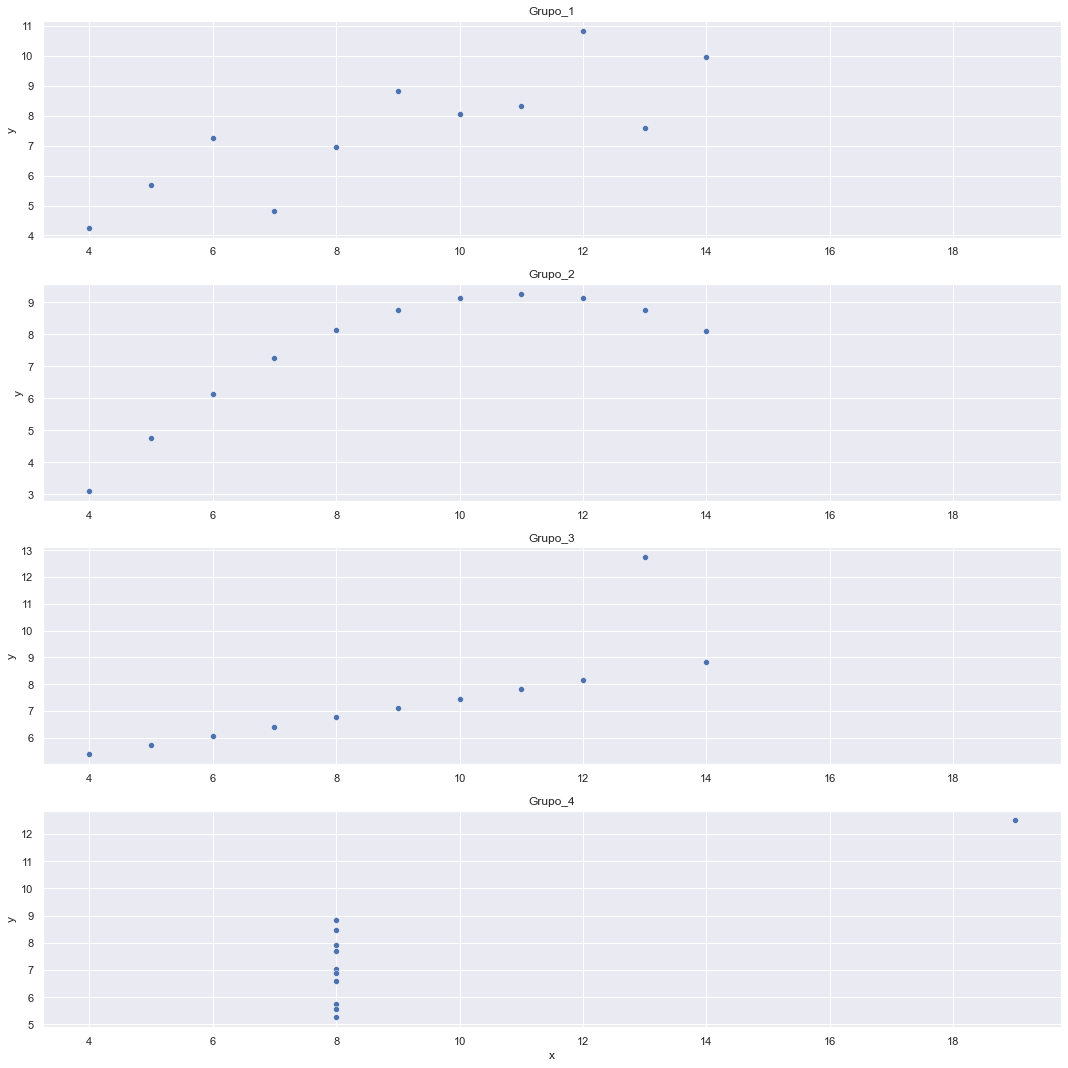

In [88]:
fig, axes = plt.subplots(4, sharex=True, figsize=(15,15))
word = 'Grupo_'
for i in range(1,5):
    word_2 = word+str(i) ###iteracion para iterar sobre cada grupo, esto genera Grupo_i
    df1 = df.loc[df['grupo'] == word_2] #Creamos un dataframe sobre cada grupo de la columna grupo
    
    sns.scatterplot(ax=axes[i-1], x ='x', y ='y', data=df1)   #Grafico de dispersion
    axes[i-1].set_title(word_2) #Usamos como titulo el grupo 
    
for a in axes[:]: #Ajuste de grafico
    a.tick_params(labelbottom=True)

fig.tight_layout()

Todos poseen distribucuiones diferentes, en particular, el grupo 4 posee una linea vertical indicando multiples valores para x = 8.

### Pregunta 2

In [89]:
word = 'Grupo_'
for i in range(1,5):
    word_2 = word+str(i) ###iteracion para iterar sobre cada grupo, esto genera Grupo_i
    df1 = df.loc[df['grupo'] == word_2] #Creamos un dataframe sobre cada grupo de la columna grupo
    df2 = df1.describe() 
    print(word_2)
    print(df2)
    print('-----------------------O------------------------')

Grupo_1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
-----------------------O------------------------
Grupo_2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
-----------------------O------------------------
Grupo_3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
-----------------------O------------------------
Grupo_4
               x          y
count  11.000000  11.000000
mean    9

Todos los grupos tienen 11 datos por cada columna x e y, y practicamente las mismas caracteristicas estadísticas tal y como fue mencionado, pero difieren en sus valores como tal.

### Pregunta 3

Las interpretaciones de los graficos se mencionan en la pregunta 5 para cada grupo.

In [90]:
import statsmodels.api as sm

word = 'Grupo_'
for i in range(1,5):
    word_2 = word+str(i) ###iteracion para iterar sobre cada grupo, esto genera Grupo_i
    df1 = df.loc[df['grupo'] == word_2] #Creamos un dataframe sobre cada grupo de la columna grupo
    
    model = sm.OLS(df1['y'], sm.add_constant(df1['x'])) #regresion lineal
    results = model.fit()
    print('------------------------O---------------------------------')
    print(word_2)
    print(results.summary()) #Entrega un resumen de resultados
    print('------------------------O---------------------------------')
    print(' ')
    print(' ')

------------------------O---------------------------------
Grupo_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00217
Time:                        16:16:10   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

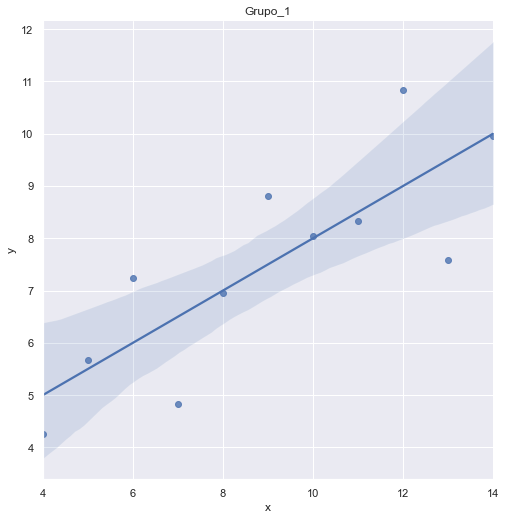

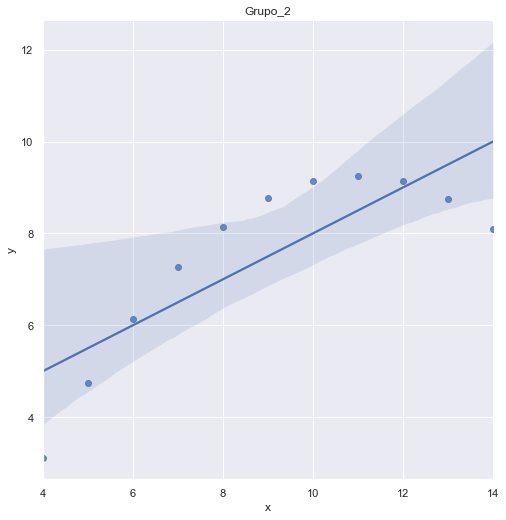

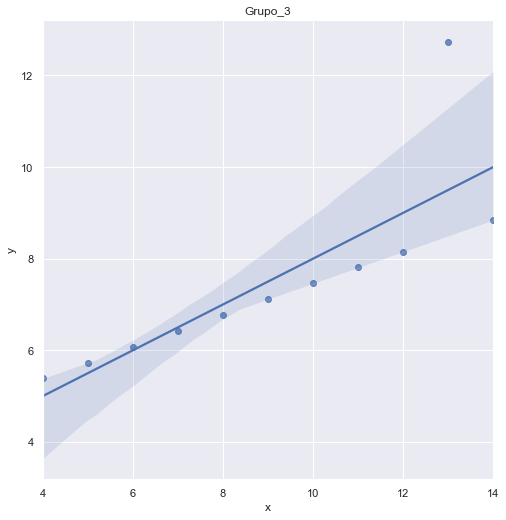

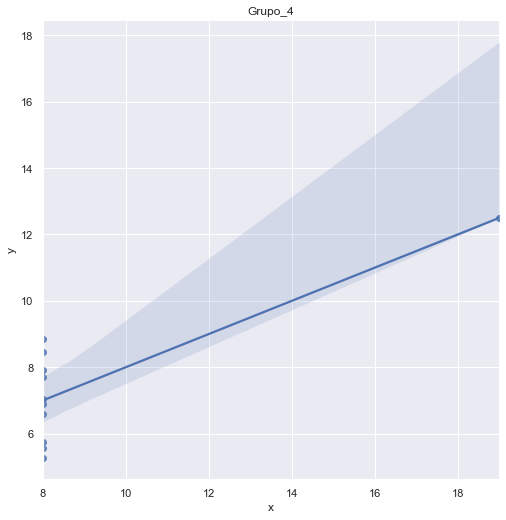

In [91]:
#Graficos

word = 'Grupo_'
for i in range(1,5):
    word_2 = word+str(i) ###iteracion para iterar sobre cada grupo, esto genera Grupo_i
    df1 = df.loc[df['grupo'] == word_2] #Creamos un dataframe sobre cada grupo de la columna grupo
    
    sns.lmplot(x ='x', y ='y', data=df1, height = 7)   #Grafico de regresion lineal
    ax = plt.gca()
    ax.set_title(word_2) #Titulo del grafico

### Pregunta 4

In [92]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from metrics_regression import *

word = 'Grupo_'
for i in range(1,5):
    word_2 = word+str(i) ###iteracion para iterar sobre cada grupo, esto genera Grupo_i
    df1 = df.loc[df['grupo'] == word_2] #Creamos un dataframe sobre cada grupo de la columna grupo
    
    model = sm.OLS(df1['y'], sm.add_constant(df1['x'])) #regresion lineal
    results = model.fit() 
    y_pred = results.predict(sm.add_constant(df1['x']))
    
    df_temp = pd.DataFrame( #Dataframe utilizado para medir las diferentes metricas por grupo
    {
        'y':df1['y'],
        'yhat': y_pred
        }
    )

    
    
    print('------------------------O---------------------------------')
    print(word_2)
    print(summary_metrics(df_temp)) #resumen de metricas
    print('------------------------O---------------------------------')
    print(' ')
    print(' ')

------------------------O---------------------------------
Grupo_1
      mae     mse    rmse    mape  maape   wmape   mmape   smape
0  0.8374  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167
------------------------O---------------------------------
 
 
------------------------O---------------------------------
Grupo_2
      mae     mse    rmse   mape   maape  wmape   mmape   smape
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438
------------------------O---------------------------------
 
 
------------------------O---------------------------------
Grupo_3
     mae     mse    rmse    mape   maape   wmape   mmape   smape
0  0.716  1.2506  1.1183  0.0797  0.0791  0.0955  0.0712  0.0814
------------------------O---------------------------------
 
 
------------------------O---------------------------------
Grupo_4
      mae     mse    rmse    mape   maape   wmape   mmape   smape
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303
-----------------------

Los 4 grupos poseen valores similares para algunos errores, mientras que en otros difieren, sobre todo el grupo 4, y esto ultimo tiene sentido debido a su distribución de puntos.

### Pregunta 5

#### Grupo 4

No tiene sentido hacer una regresión lineal para el grupo 4 ya que existen multiples valores y para x = 8, lo cual, puede indicar mediciones independientes de distintos fenómenos para x = 8, además, desde un punto de vista matemático, no tiene sentido buscar una función lineal que represente estos 8 datos ya que por definición de función no se pueden tener valores distintos en un mismo punto x.

#### Grupo 1

No es necesario hacer otro modelo que la regresión lineal para el grupo 1, ya que, viendo su gráfico de dispersión (pregunta 1), se observa que no hay relación clara ya sea polinomial, o exponencial, en particular, debido a la poca cantidad de datos no es viable afirmar que otro modelo se ajustaría mejor para representar su tendencia. 

Además, el valor de $R^2$ de 0,6 aproximadamente indica que no se tiene un comportamiento lineal del todo en los datos.

En conclusión, la regresión lineal es el mejor ajuste para este pequeño conjunto de datos, aún más, remover posibles outliers no es viable en este caso debido a que son muy pocos y no se ve tan claro a partir del gráfico la existencia de estos.

#### Grupo 2

Se tiene la siguiente gráfica de dispersión para el grupo 2.

<AxesSubplot:xlabel='x', ylabel='y'>

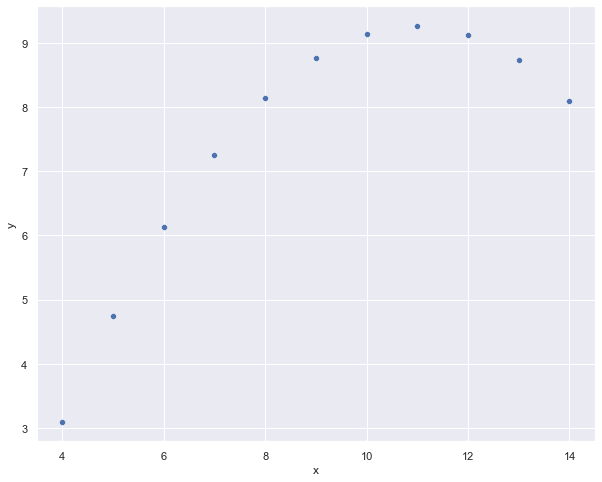

In [93]:
sns.set(rc={'figure.figsize':(10,8)}) 

df1 = df.loc[df['grupo'] == 'Grupo_2'] #Creamos un dataframe del grupo 2
    
sns.scatterplot(x ='x', y ='y', data=df1)   #Grafico de dispersion

Claramente, esto no representa un comportamiento lineal debido a la "cascada" que se produce a partir  de x = 12, aún más, a simple vista se ve una tendencia a un comportamiento polinomial, por lo que este será el acercamiento.

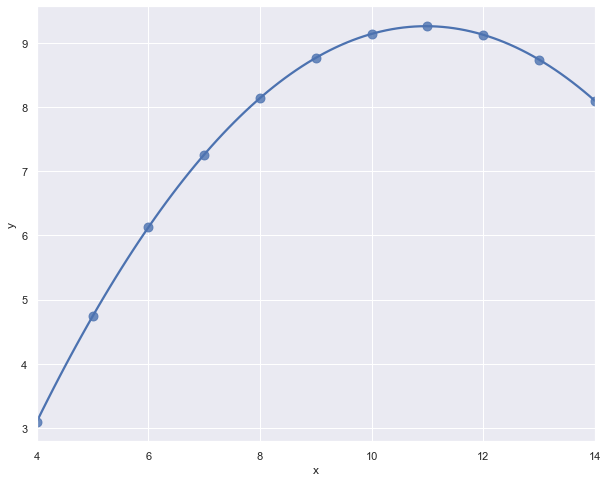

In [94]:
ax = sns.regplot(x="x", y="y", data= df1,
                 scatter_kws={"s": 80},
                 order=2, ci=None) #Ajuste polinomial usando Seaborn, de orden 2

A partir de este gráfico, concluimos que una regresión polinomial de orden 2 es el ajuste perfecto para este conjunto de datos, sin embargo, veamos el score $R^2$ usando sklearn.

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2) #ajuste polinomial

X_poly = poly.fit_transform(df1['x'].values.reshape(-1, 1)) #ajuste de datos
 
poly.fit(X_poly, df1['y'])

lin2 = LinearRegression()
lin2.fit(X_poly, df1['y']) #regresion lineal con los datos ajustados

y_pred = lin2.predict(X_poly)

print('R2 = ', r2_score(df1['y'], y_pred)) #Score R2 para el ajuste polinomial


R2 =  0.999999457857722


Con este valor de $R^2$ concluimos que el ajuste polinomial de orden 2 es el adecuacdo para este conjunto de datos.

#### Grupo 3

Viendo la gráfica de dispersión se ve lo siguiente

<AxesSubplot:xlabel='x', ylabel='y'>

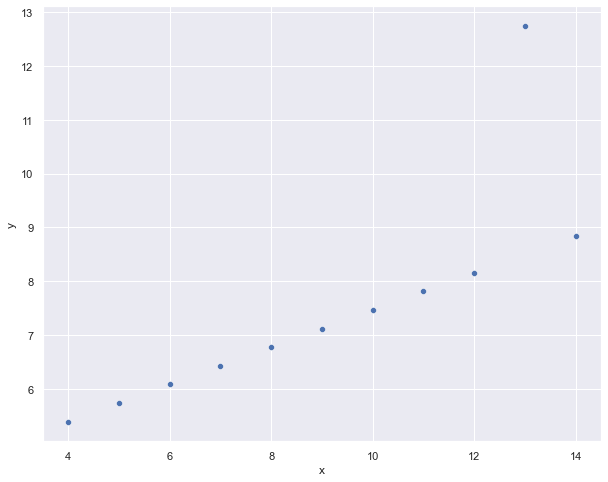

In [96]:
sns.set(rc={'figure.figsize':(10,8)})

df1 = df.loc[df['grupo'] == 'Grupo_3'] #Creamos un dataframe sobre cada grupo de la columna grupo
    
sns.scatterplot(x ='x', y ='y', data=df1)   #Grafico de dispersion


Claramente existe un outlier significativo, por lo que lo eliminaremos, por regla general, un outlier es un dato que tiene (en valor absoluto) un z-score mayor a 3, pero en este caso, no hay, por lo que consideramos los mayores a 2.5 como outliers.

------------------------O---------------------------------
Grupo_3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.17e-22
Time:                        16:16:13   Log-Likelihood:                 44.749
No. Observations:                  10   AIC:                            -85.50
Df Residuals:                       8   BIC:                            -84.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

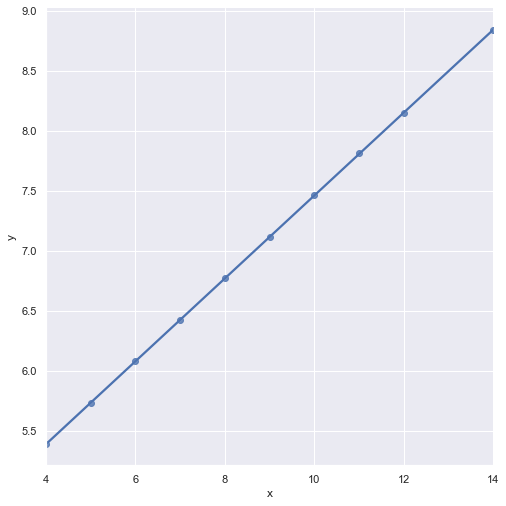

In [97]:
from scipy import stats
import statsmodels.api as sm

pd.options.mode.chained_assignment = None #ignorar los warning

df1 = df.loc[df['grupo'] == 'Grupo_3'] #dataframe de grupo 3
df1['z_score'] = stats.zscore(df1['y']) #zscore para el grupo 3

#nos quedamos solo con los datos que tienen un z-score menor a 2.5
df1['abs_z_score'] = df1['z_score'].abs()
df2 = df1.loc[df1['abs_z_score'] < 2.5] 
sns.lmplot(x ='x', y ='y', data=df2, height = 7) #grafico de regresion lineal

model = sm.OLS(df2['y'], sm.add_constant(df2['x'])) #regresion lineal
results = model.fit()
print('------------------------O---------------------------------')
print('Grupo_3')
print(results.summary()) #Tabla de resultados
print('------------------------O---------------------------------')
print(' ')
print(' ')

Se observa que ahora $R^2$ es de 1, lo que indica que los datos se ajustan perfectamente a una recta.

In [98]:
#Cristóbal Lobos - Rol: 201610519-0